# Analyzing Results of the CSV File

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Load the CSV file
file_path = 'results.csv'
data = pd.read_csv(file_path)

In [8]:
# Display the first few rows of the dataset
print("First few rows of the data:")
print(data.head())

First few rows of the data:
    operation1   operation2  repetitions  correct_count
0  (x + y) + z  x + (y + z)          500            420
1  (x + y) + z  x + (y + z)         1000            830
2  (x + y) + z  x + (y + z)         2000           1640
3        x + y        y + x          500            500
4        x + y        y + x         1000           1000


In [9]:
# Prepare the dataset by encoding categorical variables
data_encoded = pd.get_dummies(data[['operation1', 'operation2', 'repetitions']], drop_first=True)

In [10]:
# Define features (X) and target (y)
X = data_encoded
y = data['correct_count']

In [11]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize and train a decision tree regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

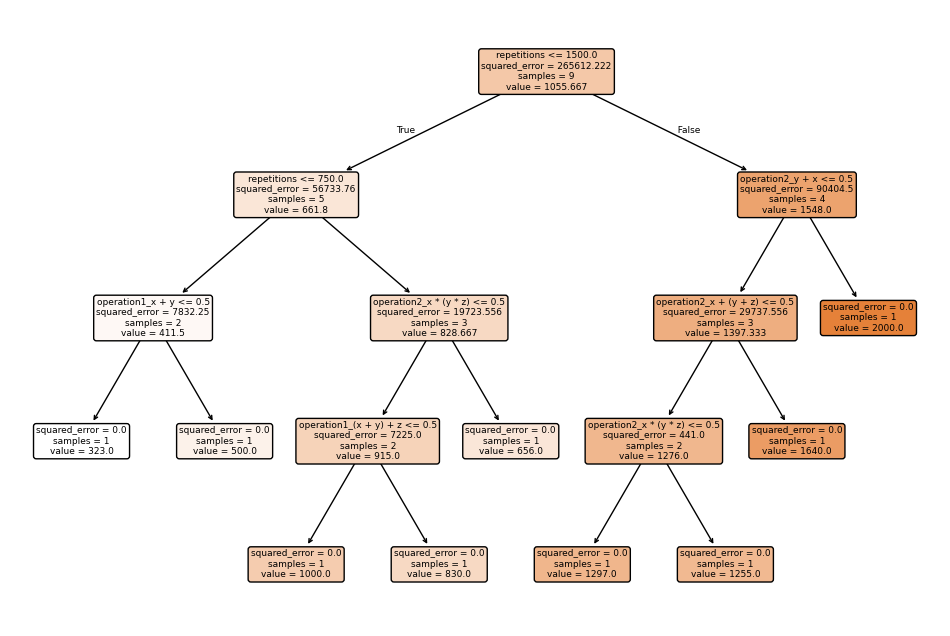

In [13]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [15]:
# Feature importance
importance = tree.feature_importances_
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Importance: {v:.3f}')

Feature: repetitions, Importance: 0.817
Feature: operation1_(x + y) + z, Importance: 0.006
Feature: operation1_x * (y / z), Importance: 0.000
Feature: operation1_x + y, Importance: 0.007
Feature: operation2_x * (y * z), Importance: 0.019
Feature: operation2_x + (y + z), Importance: 0.037
Feature: operation2_y + x, Importance: 0.114


## Key Takeaways :

The number of repetitions is the most important feature, with a feature importance score of 0.817. This indicates that the number of repetitions heavily influences the model's predictions of correct_count. It makes sense because, typically, the higher the number of repetitions, the more likely the model is to observe correct results. 
To achieve more stable results, increasing the number of repetitions may be a key factor, as the model places heavy importance on it.

The number of repetitions is clearly the most critical factor affecting the correctness of results. The more repetitions, the more stable the results seem to be. This makes sense in many computational tasks where more iterations lead to better accuracy due to averaging out randomness or errors.
The specific operations involved (whether operation1 or operation2) have relatively little impact on the correctness of the results compared to the number of repetitions. This suggests that the type of mathematical operation being performed is less important than how many times it's repeated.

For more stability, we can increase repetitions. Since repetitions have the most substantial impact, the recommendation to achieve more stable results would be to increase the number of repetitions. This should lead to more consistent outcomes.